# Project- Artificial Neural Networks: Street View Housing Number Digit Recognition


### Context: 

The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications. The Street View House Numbers (SVHN) dataset is one of the most popular ones. It has been used in neural networks created by Google to read house numbers and match them to their geolocations. This is a great benchmark dataset to play with, learn and train models that accurately identify street numbers, and incorporate into all sorts of projects.

### Objective:
The objective of the exercise is to perform an image classification exercise on the given dataset to come up with a model that can help identify the digit images which have issues like picture brightness, blurriness. 

### More about the dataset
- The dataset is provided as a .h5 file. The basic preprocessing steps have been done.

### Mount the drive
Let us start by mounting the drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Check for the version of installed tensorflow.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


### Load the dataset
- Let us now, load the dataset that is available as a .h5 file.
- Split the data into train and the test dataset

In [ ]:
import h5py
import numpy as np

# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]


# Close this file
h5f.close()

Let us import the required libraries now.

In [ ]:
## Importing the required libraries
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

### Visualising images
- Use X_train to visualise the first 10 images.
- Use Y_train to print the first 10 labels

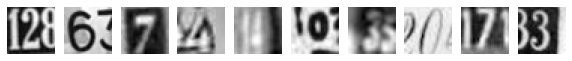

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train1[0:10]))

### Data preparation

- Printing the first image in the train image and figure out the shape of the images
- Reshaping the train and the test dataset to flatten them. Figure out the required shape
- Normalising the train and the test dataset by dividing by 255.
- Printing the new shapes of the train and the test set.
- One hot encoding the target variables

In [ ]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Reshaping the dataset to flatten them. Remember that we are trying to reshape the 2D image data into a 1D array

X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

In [ ]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# New shape 

print('Training set:', X_train.shape, y_train1.shape)
print('Test set:', X_test.shape, y_test1.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


In [ ]:
# one hot encode output
y_train = to_categorical(y_train1)
y_test = to_categorical(y_test1)

# no.of classes
num_classes = y_test.shape[1]
num_hidden = 32

### Model Building
- Writing a function that returns a sequential model with the following architecture
 - First hidden layer with 256 nodes and relu activation
 - Second hidden layer with 64 nodes and relu activation 
 - Third hidden layer with 64 nodes and relu activation
 - 4th hidden layer with 32 nodes and relu activation
 - Output layer with softmax activation and no of nodes equal to the number of classes
- Compilinh the model with the categorical_crossentropy loss, adam optmizers (lr = 0.001) and accuracy metric
- Calling the model and fit on the train data with a validation split of 0.2, batch size = 128, verbose = 1 and 30 epochs. Storing the model building history to use it later for visualisation.
- printing the summary of the model 


In [ ]:
# define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers


def nn_model_1():
    # create model
    model = Sequential()  
    
    model.add(Dense(256, activation='relu')) 
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    # Compile model
    adam = optimizers.Adam(lr=1e-3)
    model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
# Build the model
model_1 = nn_model_1()

# Fit the model
history_model_1 = model_1.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=128, verbose=1)

Epoch 1/30
263/263 [==============================] - 1s 4ms/step - loss: 2.3054 - accuracy: 0.1043 - val_loss: 2.3034 - val_accuracy: 0.1105
Epoch 2/30
263/263 [==============================] - 1s 3ms/step - loss: 2.2957 - accuracy: 0.1086 - val_loss: 2.2072 - val_accuracy: 0.1674
Epoch 3/30
263/263 [==============================] - 1s 3ms/step - loss: 2.0642 - accuracy: 0.2146 - val_loss: 1.9270 - val_accuracy: 0.2825
Epoch 4/30
263/263 [==============================] - 1s 3ms/step - loss: 1.7400 - accuracy: 0.3678 - val_loss: 1.6037 - val_accuracy: 0.4361
Epoch 5/30
263/263 [==============================] - 1s 3ms/step - loss: 1.5392 - accuracy: 0.4619 - val_loss: 1.4664 - val_accuracy: 0.4993
Epoch 6/30
263/263 [==============================] - 1s 3ms/step - loss: 1.3996 - accuracy: 0.5308 - val_loss: 1.3280 - val_accuracy: 0.5638
Epoch 7/30
263/263 [==============================] - 1s 3ms/step - loss: 1.3105 - accuracy: 0.5651 - val_loss: 1.2750 - val_accuracy: 0.5831
Epoch 

In [ ]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 285,418
Trainable params: 285,418
Non-trainable params: 0
_________________________________________________________________


### Plotting the validation and training accuracies (2 marks)

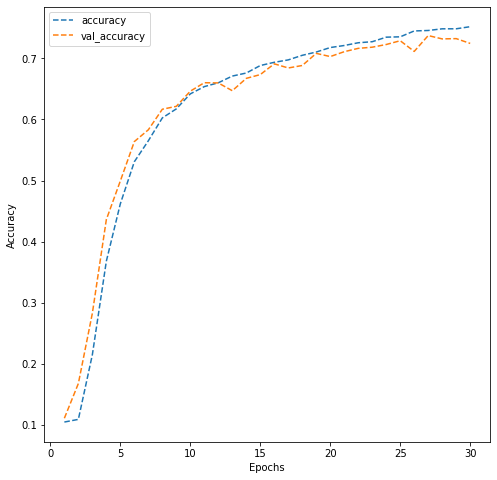

In [ ]:
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Comments**
- The accuracy on the train set is a bit better than the validation set and thus there is some amount of overfitting. However the overfit is small.


### Test set prediction and final comments
- predict on the test set and comment on the resultls obtained.

In [ ]:
# predict on the test dataset
test_pred = np.argmax(model_1.predict(X_test), axis = -1)

from sklearn.metrics import classification_report
print(classification_report(y_test1, test_pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1814
           1       0.74      0.80      0.77      1828
           2       0.70      0.80      0.75      1803
           3       0.80      0.63      0.71      1719
           4       0.77      0.80      0.78      1812
           5       0.70      0.66      0.68      1768
           6       0.75      0.72      0.73      1832
           7       0.80      0.77      0.78      1808
           8       0.68      0.65      0.66      1812
           9       0.62      0.74      0.67      1804

    accuracy                           0.73     18000
   macro avg       0.73      0.73      0.73     18000
weighted avg       0.73      0.73      0.73     18000



#### Comments
- The accuracy is 0.76 on the test set. This is comparable with the results on the train and the validation set.
- The recall values are good for all the digits with 1 and 4 having recall values above 80%.
- The precision values are also good. 1 and 5 have values below 70%.

